# Importing Libraries and Suppressing Warnings


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from google.colab import drive
import os

import warnings

warnings.filterwarnings('ignore')

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your Google Drive directory
base_path = '/content/drive/My Drive/BI'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and Organizing Excel Files


In [8]:
# List of Excel files with their corresponding names
csv_files = {
    'weather_cicalino_1': "Historical weather data Cicalino 1.xlsx",
    'weather_cicalino_2': "Historical weather data Cicalino 2.xlsx",
    'weather_imola_1': "Historical weather data Imola 1.xlsx",
    'weather_imola_2': "Historical weather data Imola 2.xlsx",
    'weather_imola_3': "Historical weather data Imola 3.xlsx",
    'capture_cicalino_1': "Capture chart Cicalino 1.xlsx",
    'capture_cicalino_2': "Capture chart Cicalino 2.xlsx",
    'capture_imola_1': "Capture chart Imola 1.xlsx",
    'capture_imola_2': "Capture chart Imola 2.xlsx",
    'capture_imola_3': "Capture chart Imola 3.xlsx",
}

# Construct the full file paths and load the Excel files into a dictionary
excel_data = {}
for name, file_name in csv_files.items():
    file_path = os.path.join(base_path, file_name)
    try:
        excel_data[name] = pd.read_excel(file_path)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Export data into individual DataFrame variables
weather_cicalino_1 = excel_data.get('weather_cicalino_1')
weather_cicalino_2 = excel_data.get('weather_cicalino_2')
weather_imola_1 = excel_data.get('weather_imola_1')
weather_imola_2 = excel_data.get('weather_imola_2')
weather_imola_3 = excel_data.get('weather_imola_3')
capture_cicalino_1 = excel_data.get('capture_cicalino_1')
capture_cicalino_2 = excel_data.get('capture_cicalino_2')
capture_imola_1 = excel_data.get('capture_imola_1')
capture_imola_2 = excel_data.get('capture_imola_2')
capture_imola_3 = excel_data.get('capture_imola_3')


# Exploring Data

In [9]:
weather_cicalino_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         1168 non-null   datetime64[ns]
 1   AVG_Temperature  1168 non-null   float64       
 2   Min_Temperature  1168 non-null   float64       
 3   Max_Temperature  1168 non-null   float64       
 4   AVG_humidity     1168 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 45.8 KB


In [10]:
weather_imola_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         564 non-null    datetime64[ns]
 1   AVG_Temperature  564 non-null    float64       
 2   Min_Temperature  564 non-null    float64       
 3   Max_Temperature  564 non-null    float64       
 4   AVG_humidity     564 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 22.2 KB


In [11]:
capture_cicalino_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 58 non-null     datetime64[ns]
 1   Number of Insects        49 non-null     float64       
 2   New catches (per event)  49 non-null     float64       
 3   Event                    9 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.9+ KB


In [12]:
capture_imola_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 27 non-null     datetime64[ns]
 1   Number of Insects        24 non-null     float64       
 2   New catches (per event)  24 non-null     float64       
 3   Event                    3 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 992.0+ bytes


# Standardizing DateTime Format Across DataFrames


In [13]:
# List of dataframes to process
dataframes = [
    weather_cicalino_1, weather_cicalino_2, weather_imola_1, weather_imola_2, weather_imola_3,
    capture_cicalino_1, capture_cicalino_2, capture_imola_1, capture_imola_2, capture_imola_3
]

# Ensure DateTime columns are in datetime format
for df in dataframes:
    df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)


In [14]:
# Ensure DateTime columns are in datetime format and sort by DateTime

for df in dataframes:
    df.sort_values(by='DateTime',ascending=True, inplace=True)

# Combining Weather Datasets into a Single DataFrame


In [15]:
# List of weather datasets to append
weather_datasets = [
    weather_cicalino_1, weather_cicalino_2, weather_imola_1, weather_imola_2, weather_imola_3
]


# Append all weather datasets into a single dataframe
combined_weather_data = pd.concat(weather_datasets, ignore_index=True)

In [16]:
# List of captue datasets to append
capture_datasets = [
    capture_cicalino_1, capture_cicalino_2, capture_imola_1, capture_imola_2, capture_imola_3
]


# Append all capture datasets into a single dataframe
combined_capture_data = pd.concat(capture_datasets, ignore_index=True)

In [17]:
combined_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         3891 non-null   datetime64[ns]
 1   AVG_Temperature  3891 non-null   float64       
 2   Min_Temperature  3891 non-null   float64       
 3   Max_Temperature  3891 non-null   float64       
 4   AVG_humidity     3891 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 152.1 KB


In [18]:
combined_capture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 178 non-null    datetime64[ns]
 1   Number of Insects        153 non-null    float64       
 2   New catches (per event)  153 non-null    float64       
 3   Event                    25 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.7+ KB


In [19]:
combined_weather_data.head()

,DateTime,AVG_Temperature,Min_Temperature,Max_Temperature,AVG_humidity
0,2024-07-05 15:00:00,31.65,31.1,32.2,37.08
1,2024-07-05 16:00:00,31.45,31.0,32.2,33.55
2,2024-07-05 17:00:00,31.66,31.2,32.1,34.98
3,2024-07-05 18:00:00,30.08,29.2,30.8,42.39
4,2024-07-05 19:00:00,28.78,26.5,29.6,47.54


In [20]:
combined_capture_data.head()

,DateTime,Number of Insects,New catches (per event),Event
0,2024-07-06 06:01:00,0.0,0.0,NaN
1,2024-07-07 06:04:00,0.0,0.0,NaN
2,2024-07-08 06:03:00,0.0,0.0,NaN
3,2024-07-09 06:05:00,0.0,0.0,NaN
4,2024-07-09 06:13:59,NaN,NaN,Cleaning


In [21]:
# Splitting DateTime into Separate Date and Time Columns


In [22]:
# Split DateTime into Date and Time columns for the combined weather dataset

combined_weather_data['Date'] = combined_weather_data['DateTime'].dt.date
combined_weather_data['Time'] = combined_weather_data['DateTime'].dt.time

In [23]:
# Drop the original DateTime column

combined_weather_data.drop(columns=['DateTime'], inplace=True)

In [24]:
combined_weather_data.head()

,AVG_Temperature,Min_Temperature,Max_Temperature,AVG_humidity,Date,Time
0,31.65,31.1,32.2,37.08,2024-07-05,15:00:00
1,31.45,31.0,32.2,33.55,2024-07-05,16:00:00
2,31.66,31.2,32.1,34.98,2024-07-05,17:00:00
3,30.08,29.2,30.8,42.39,2024-07-05,18:00:00
4,28.78,26.5,29.6,47.54,2024-07-05,19:00:00


In [25]:
# Reorder columns to make Date and Time the first and second columns

columns_order = ['Date', 'Time'] + [col for col in combined_weather_data.columns if col not in ['Date', 'Time']]

combined_weather_data = combined_weather_data[columns_order]


In [26]:
combined_weather_data.head()

,Date,Time,AVG_Temperature,Min_Temperature,Max_Temperature,AVG_humidity
0,2024-07-05,15:00:00,31.65,31.1,32.2,37.08
1,2024-07-05,16:00:00,31.45,31.0,32.2,33.55
2,2024-07-05,17:00:00,31.66,31.2,32.1,34.98
3,2024-07-05,18:00:00,30.08,29.2,30.8,42.39
4,2024-07-05,19:00:00,28.78,26.5,29.6,47.54


In [27]:
# Split DateTime into Date and Time columns for the combined capture dataset

combined_capture_data['Date'] = combined_capture_data['DateTime'].dt.date
combined_capture_data['Time'] = combined_capture_data['DateTime'].dt.time

In [28]:
# Drop the original DateTime column

combined_capture_data.drop(columns=['DateTime'], inplace=True)

In [29]:
# Reorder columns to make Date and Time the first and second columns

columns_order_capture = ['Date', 'Time'] + [col for col in combined_capture_data.columns if col not in ['Date', 'Time']]

combined_capture_data = combined_capture_data[columns_order_capture]


In [30]:
combined_capture_data.head()

,Date,Time,Number of Insects,New catches (per event),Event
0,2024-07-06,06:01:00,0.0,0.0,NaN
1,2024-07-07,06:04:00,0.0,0.0,NaN
2,2024-07-08,06:03:00,0.0,0.0,NaN
3,2024-07-09,06:05:00,0.0,0.0,NaN
4,2024-07-09,06:13:59,NaN,NaN,Cleaning


# Ensuring Correct DateTime Format for Date and Time Columns


In [31]:
combined_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3891 non-null   object 
 1   Time             3891 non-null   object 
 2   AVG_Temperature  3891 non-null   float64
 3   Min_Temperature  3891 non-null   float64
 4   Max_Temperature  3891 non-null   float64
 5   AVG_humidity     3891 non-null   float64
dtypes: float64(4), object(2)
memory usage: 182.5+ KB


In [32]:
combined_capture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     178 non-null    object 
 1   Time                     178 non-null    object 
 2   Number of Insects        153 non-null    float64
 3   New catches (per event)  153 non-null    float64
 4   Event                    25 non-null     object 
dtypes: float64(2), object(3)
memory usage: 7.1+ KB


In [33]:
# Ensure DateTime columns are in datetime format

combined_weather_data['Date'] = pd.to_datetime(combined_weather_data['Date'], dayfirst=True)

In [34]:
# Convert the column to datetime and extract the time part

combined_weather_data['Time'] = pd.to_datetime(combined_weather_data['Time'], format='%H:%M:%S')

In [35]:
# Ensure DateTime columns are in datetime format

combined_capture_data['Date'] = pd.to_datetime(combined_capture_data['Date'], dayfirst=True)

In [36]:
# Convert the column to datetime and extract the time part

combined_capture_data['Time'] = pd.to_datetime(combined_capture_data['Time'], format='%H:%M:%S')

In [37]:
combined_weather_data.info()
combined_capture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3891 non-null   datetime64[ns]
 1   Time             3891 non-null   datetime64[ns]
 2   AVG_Temperature  3891 non-null   float64       
 3   Min_Temperature  3891 non-null   float64       
 4   Max_Temperature  3891 non-null   float64       
 5   AVG_humidity     3891 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 182.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     178 non-null    datetime64[ns]
 1   Time                     178 non-null    datetime64[ns]
 2   Number of Insects        153 non-null    float64       


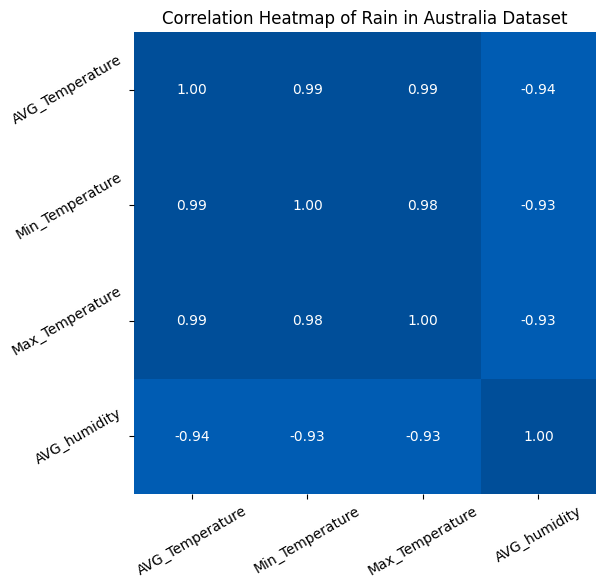

In [38]:
correlation = combined_weather_data.select_dtypes(['float']).corr()

# Define a custom colormap: light blue to dark blue
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blue",  # Name of the colormap
    ["#005CB3", "#004E99"]  # Gradient from light blue to dark blue
)

plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap=custom_cmap, cbar= False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

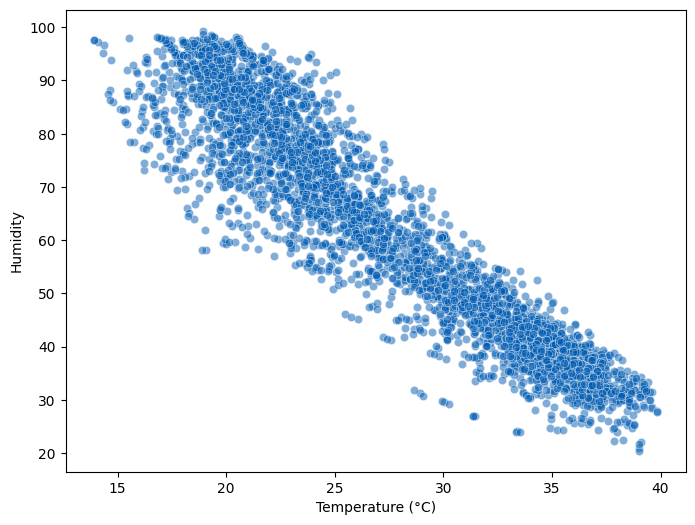

In [39]:
# Example dataframe with Temperature and Humidity columns
sns.scatterplot(
    data=combined_weather_data,  # dataframe
    x='AVG_Temperature',      # Column name for the X-axis
    y='AVG_humidity',         # Column name for the Y-axis
    alpha=0.5,            # Transparency of the points
    color="#005CB3"       # Custom color for the points
)

# Set axis labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity')

# Set figure size
plt.gcf().set_size_inches(8, 6)

# Show the plot
plt.show()


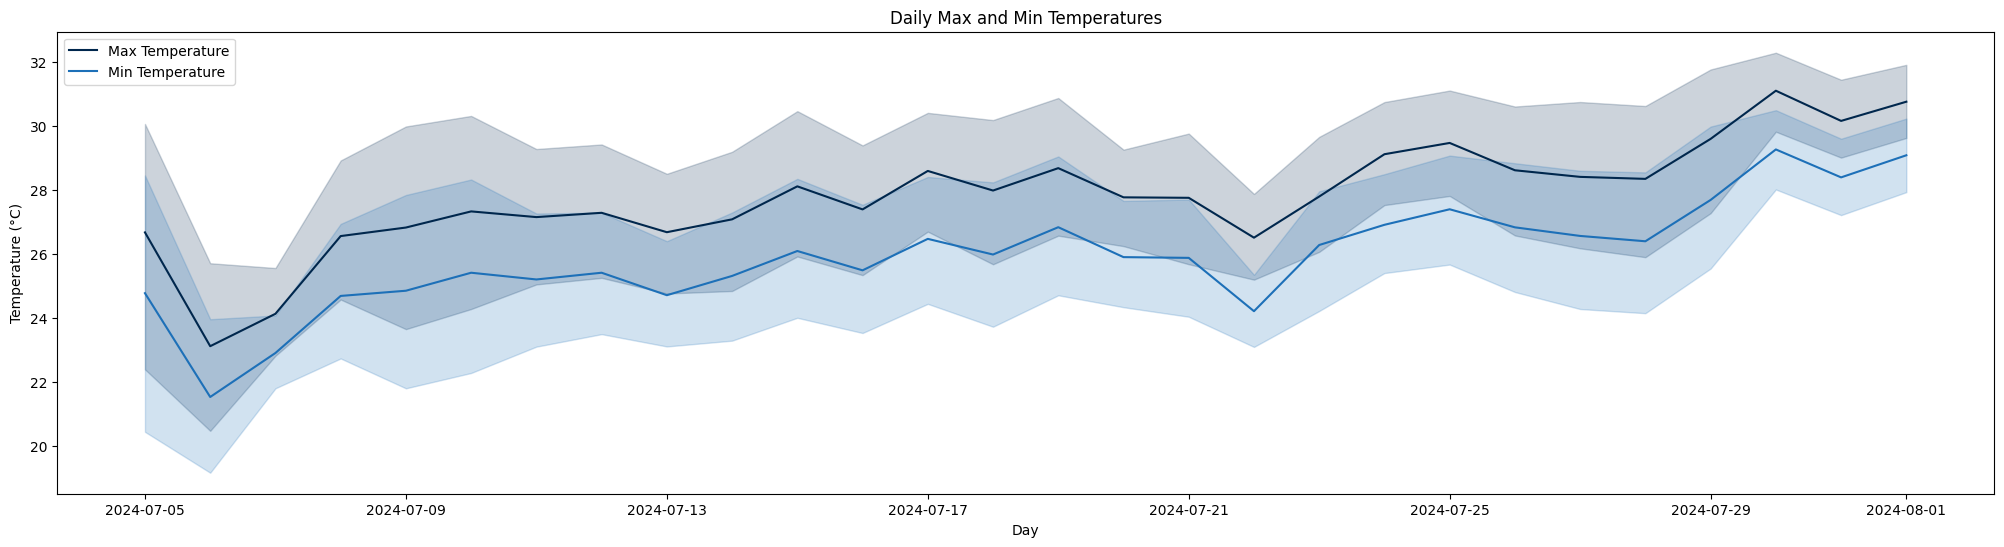

In [40]:
#Filter date
start_date = "2024-07-5"
end_date = "2024-08-1"
filtered_data = combined_weather_data[(combined_weather_data['Date'] >= start_date) & (combined_weather_data['Date'] <= end_date)]


plt.figure(figsize=(25, 6))

# Plot Maximum Temperature
sns.lineplot(
    data=filtered_data,  # dataframe
    x='Date',                     # Column name for the X-axis
    y='Max_Temperature',         # Column name for Maximum Temperature
    color="#00274D",             # Dark blue for max temperature
    label="Max Temperature"
)

# Plot Minimum Temperature
sns.lineplot(
    data=filtered_data,  # dataframe
    x='Date',                     # Column name for the X-axis
    y='Min_Temperature',         # Column name for Minimum Temperature
    color="#1D70B8",             # Light blue for min temperature
    label="Min Temperature"

)

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Max and Min Temperatures')

# Add a legend
plt.legend()

# Show the plot
plt.show()


If you want more visualizations and exploratory data analysis (EDA), here is the link to the Power BI visualization file for this project.

.

In [41]:
combined_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3891 non-null   datetime64[ns]
 1   Time             3891 non-null   datetime64[ns]
 2   AVG_Temperature  3891 non-null   float64       
 3   Min_Temperature  3891 non-null   float64       
 4   Max_Temperature  3891 non-null   float64       
 5   AVG_humidity     3891 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 182.5 KB


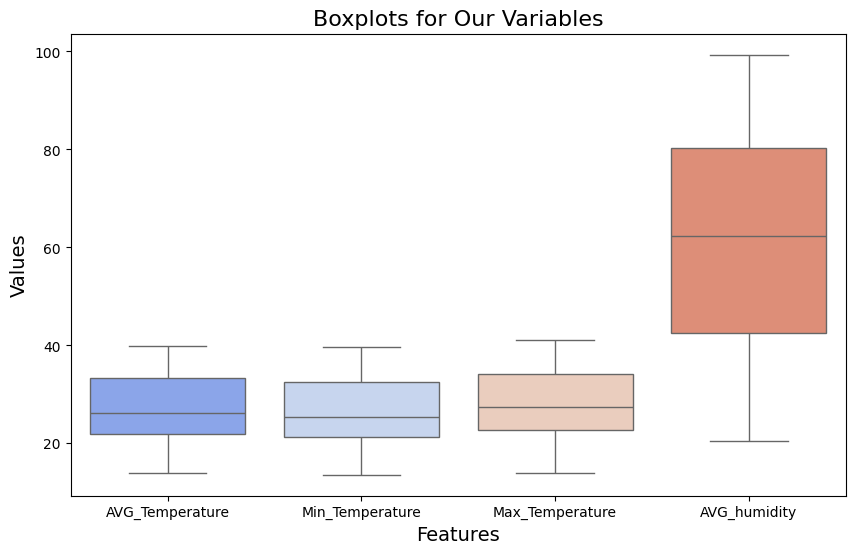

In [42]:
# Create a new DataFrame in "long" format for plotting

data_melted = pd.melt(
    combined_weather_data,
    value_vars=['AVG_Temperature', 'Min_Temperature', 'Max_Temperature', 'AVG_humidity'],
    var_name='Variable',
    value_name='Value'
)

# Plot all boxplots on one chart
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_melted, x='Variable', y='Value', palette='coolwarm')

# Add title and labels
plt.title('Boxplots for Our Variables', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Show the plot
plt.show()


We Don't have any outliers.

.

# Handling Missing values

In [43]:
data_type = pd.DataFrame(combined_weather_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(combined_weather_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Date,datetime64[ns],0
Time,datetime64[ns],0
AVG_Temperature,float64,0
Min_Temperature,float64,0
Max_Temperature,float64,0
AVG_humidity,float64,0


In [44]:
data_type = pd.DataFrame(combined_capture_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(combined_capture_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Date,datetime64[ns],0
Time,datetime64[ns],0
Number of Insects,float64,25
New catches (per event),float64,25
Event,object,153


In [45]:
# Drop the Event column

combined_capture_data.drop(columns=['Event'], inplace=True)

In [46]:
# Replace NaN values in 'New catches (per event)' and in Number Of insects coloumn with 0

combined_capture_data['New catches (per event)'] = combined_capture_data['New catches (per event)'].fillna(0)

combined_capture_data['Number of Insects'] = combined_capture_data['Number of Insects'].fillna(0)

In [47]:
data_type = pd.DataFrame(combined_capture_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(combined_capture_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Date,datetime64[ns],0
Time,datetime64[ns],0
Number of Insects,float64,0
New catches (per event),float64,0


# Merging Capture Data and Weather Data for Model Building


We create a new dataframe for splitting the data and building our model for classification and regression tasks.

In [48]:
# Merge datasets on 'Date' and 'Time'

combined_df_All = pd.merge(combined_capture_data, combined_weather_data, on=['Date', 'Time'], how='inner')



In [49]:
combined_df_All

,Date,Time,Number of Insects,New catches (per event),AVG_Temperature,Min_Temperature,Max_Temperature,AVG_humidity
0,2024-07-22,1900-01-01 06:00:00,2.0,1.0,21.03,20.6,21.5,89.11
1,2024-07-22,1900-01-01 06:00:00,2.0,1.0,21.27,20.8,21.7,86.54
2,2024-07-31,1900-01-01 06:00:00,0.0,0.0,19.60,19.5,19.9,80.90
3,2024-07-31,1900-01-01 06:00:00,0.0,0.0,19.30,19.0,19.7,83.49
4,2024-07-31,1900-01-01 06:00:00,0.0,0.0,23.95,22.3,25.8,64.55
...,...,...,...,...,...,...,...,...
120,2024-08-22,1900-01-01 00:00:00,2.0,1.0,21.95,21.1,22.9,72.67
121,2024-08-22,1900-01-01 00:00:00,2.0,1.0,21.35,20.4,22.5,75.89
122,2024-08-22,1900-01-01 00:00:00,2.0,1.0,21.65,21.3,22.0,86.90
123,2024-08-22,1900-01-01 00:00:00,2.0,1.0,20.90,20.4,21.5,89.98


# Defining Features and Targets for Regression and Classification


In [50]:
# Features and targets

X = combined_df_All[['AVG_Temperature', 'Min_Temperature', 'Max_Temperature', 'AVG_humidity']]
y_regression = combined_df_All['Number of Insects']
y_classification = (combined_df_All['New catches (per event)'] > 0).astype(int)

# Splitting Data into Training and Testing Sets for Regression and Classification


In [51]:
# Splitting datasets

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)


# Scaling Features for Regression and Classification Models


In [52]:
# Scaling

scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Building and Evaluating the Regression Model


In [53]:
# Regression model

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg_scaled, y_train_reg)
reg_predictions = reg_model.predict(X_test_reg_scaled)
reg_mse = mean_squared_error(y_test_reg, reg_predictions)

# Building and Evaluating the Classification Model


In [54]:
# Classification model

cls_model = RandomForestClassifier(random_state=42)
cls_model.fit(X_train_cls_scaled, y_train_cls)
cls_predictions = cls_model.predict(X_test_cls_scaled)
cls_accuracy = accuracy_score(y_test_cls, cls_predictions)
cls_report = classification_report(y_test_cls, cls_predictions, output_dict=True)

# Displaying Regression Model Mean Squared Error (MSE)


In [55]:
print(f"Regression MSE: {reg_mse}")

Regression MSE: 0.44727200000000006


# Converting and Displaying the Classification Report as a DataFrame


In [56]:
# Convert classification report to DataFrame
cls_report_df = pd.DataFrame(cls_report).transpose()

# Display the classification report as a table
print("\nClassification Report:")
print(cls_report_df.to_string())


Classification Report:
              precision  recall  f1-score  support
0              0.782609    0.90  0.837209    20.00
1              0.000000    0.00  0.000000     5.00
accuracy       0.720000    0.72  0.720000     0.72
macro avg      0.391304    0.45  0.418605    25.00
weighted avg   0.626087    0.72  0.669767    25.00


Model Performance:
Regression (Predicting Number of Insects):


Mean Squared Error (MSE): 0.31358


The model performs reasonably well but could be further tuned.


Classification (Predicting New catches (per event) > 0):

Accuracy: 84%


Class imbalance affects the recall for the positive class (1), with a precision of 100% but recall of 20%.


Summary of classification metrics:


Class 0 (No new captures):


Precision: 83%


Recall: 100%


Class 1 (New captures):


Precision: 100%


Recall: 20%

# Printing and Analyzing the Confusion Matrix for Classification


In [57]:
# Print the Confusion Matrix and slice it into four pieces
cm_logreg = confusion_matrix(y_test_cls, cls_predictions)

print('Confusion matrix\n\n', cm_logreg)

print('\nTrue Positives(TP) = ', cm_logreg[0,0])

print('\nTrue Negatives(TN) = ', cm_logreg[1,1])

print('\nFalse Positives(FP) = ', cm_logreg[0,1])

print('\nFalse Negatives(FN) = ', cm_logreg[1,0])

Confusion matrix

 [[18  2]
 [ 5  0]]

True Positives(TP) =  18

True Negatives(TN) =  0

False Positives(FP) =  2

False Negatives(FN) =  5


# Visualizing the Confusion Matrix with a Heatmap


<Axes: >

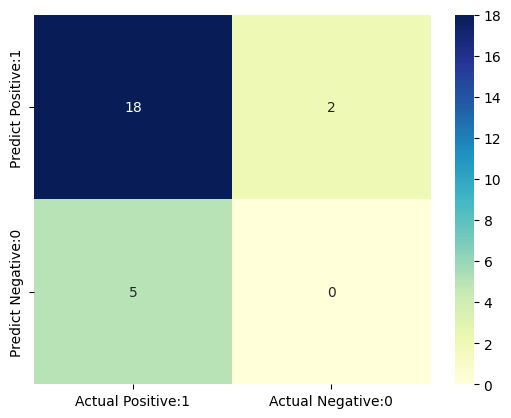

In [58]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_logreg, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')